**IMPORTED MODULES** 


In [28]:
import keras
from keras.utils.vis_utils import plot_model
from operator import add
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, add
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.layers import SpatialDropout2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from tensorflow.keras import Model
import tensorflow as tf
from google.colab import drive
import glob
import numpy as np
from PIL import Image
from imblearn.over_sampling import SMOTE 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score
import gc
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Function to creat labels according to the number of images included in a given path**

In [2]:
def get_labels(paths,i):
  return np.asarray(len(paths) * [i])

**Function to read labels from the given path and converting them to numpy array in GRAYSCALE format**

In [3]:
def get_np_images_grayscale(paths):
    images = np.zeros((len(paths),208,176,1))
    for i in range(len(paths)):
      img = tf.keras.preprocessing.image.load_img(paths[i],grayscale=True)
      images[i,:,:,:] = tf.keras.preprocessing.image.img_to_array(img).reshape((208,176,1))
    return images

**Reading data from Google Drive and saving images into files section of Google Colab by unzipping the zip data**

In [4]:
# TRAIN DATA UPLOAD FROM DRIVE
!unzip gdrive/My\ Drive/VeryMildDemented_train.zip
!unzip gdrive/My\ Drive/MildDemented_train.zip
!unzip gdrive/My\ Drive/NonDemented_train.zip
!unzip gdrive/My\ Drive/ModerateDemented_train.zip

# TEST DATA UPLOAD FROM DRIVE
!unzip gdrive/My\ Drive/VeryMildDemented_test.zip
!unzip gdrive/My\ Drive/MildDemented_test.zip
!unzip gdrive/My\ Drive/NonDemented_test.zip
!unzip gdrive/My\ Drive/ModerateDemented_test.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/NonDemented_train/._nonDem2475.jpg  
  inflating: NonDemented_train/nonDem1197.jpg  
  inflating: __MACOSX/NonDemented_train/._nonDem1197.jpg  
  inflating: NonDemented_train/nonDem1829.jpg  
  inflating: __MACOSX/NonDemented_train/._nonDem1829.jpg  
  inflating: NonDemented_train/nonDem800.jpg  
  inflating: __MACOSX/NonDemented_train/._nonDem800.jpg  
  inflating: NonDemented_train/nonDem814.jpg  
  inflating: __MACOSX/NonDemented_train/._nonDem814.jpg  
  inflating: NonDemented_train/nonDem1183.jpg  
  inflating: __MACOSX/NonDemented_train/._nonDem1183.jpg  
  inflating: NonDemented_train/nonDem182.jpg  
  inflating: __MACOSX/NonDemented_train/._nonDem182.jpg  
  inflating: NonDemented_train/nonDem1815.jpg  
  inflating: __MACOSX/NonDemented_train/._nonDem1815.jpg  
  inflating: NonDemented_train/nonDem1801.jpg  
  inflating: __MACOSX/NonDemented_train/._nonDem1801.jpg  
  inflating: NonDemented_train/nonDem828

**Dataset consists of 4 different classes with their training and testing data  given separetely:**

1.   Mild Demented
2.   Moderate Demented
3.   Non Demented
4.   Very Mild Demented



**Path of each class are saved for both training and testing data individually**

In [4]:
#PATH OH THE DATA
MildDemented_test = "/content/MildDemented_test"
MildDemented_train = "/content/MildDemented_train"
ModerateDemented_train = "/content/ModerateDemented_train"
ModerateDemented_test = "/content/ModerateDemented_test"
NonDemented_train = "/content/NonDemented_train"
NonDemented_test = "/content/NonDemented_test"
VeryMildDemented_train = "/content/VeryMildDemented_train"
VeryMildDemented_test = "/content/VeryMildDemented_test"

**Extending the paths in order to read .jpg format images**

In [5]:
#PATH INCLUDING JPG
MildDemented_test_path = glob.glob(MildDemented_test + '/*.jpg')
MildDemented_train_path = glob.glob(MildDemented_train + '/*.jpg')
ModerateDemented_train_path = glob.glob(ModerateDemented_train + '/*.jpg')
ModerateDemented_test_path = glob.glob(ModerateDemented_test + '/*.jpg')
NonDemented_train_path = glob.glob(NonDemented_train + '/*.jpg')
NonDemented_test_path = glob.glob(NonDemented_test + '/*.jpg')
VeryMildDemented_train_path = glob.glob(VeryMildDemented_train + '/*.jpg')
VeryMildDemented_test_path = glob.glob(VeryMildDemented_test + '/*.jpg')

**Number of images per class:**
  

>*Training Data*
1.   MildDemented - 717
2.   ModerateDemented - 52
3.   NonDemented - 2560
4.   VeryMildDemented - 1792

>*Test Data*
1.   MildDemented - 179
2.   ModerateDemented - 12
3.   NonDemented - 640
4.   VeryMildDemented - 448


**Moderate Demented MRI Image (Train)**

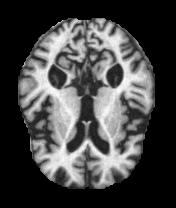

In [6]:
img = tf.keras.preprocessing.image.load_img(ModerateDemented_train_path[0])
img


**Moderate Demented MRI Image (Test)**

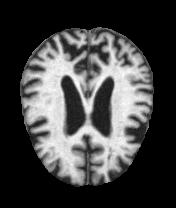

In [7]:
img = tf.keras.preprocessing.image.load_img(ModerateDemented_test_path[11])
img

**Mild Demented MRI Image (Train)**

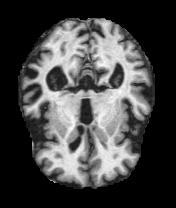

In [8]:
img = tf.keras.preprocessing.image.load_img(MildDemented_train_path[4])
img

**Mild Demented MRI Image (Test)**

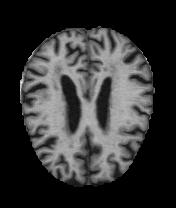

In [9]:
img = tf.keras.preprocessing.image.load_img(MildDemented_test_path[3])
img

**Non Demented MRI Image (Train)**

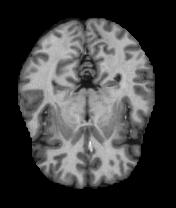

In [10]:
img = tf.keras.preprocessing.image.load_img(NonDemented_train_path[2])
img

**Non Demented MRI Image (Test)**

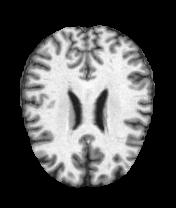

In [11]:
img = tf.keras.preprocessing.image.load_img(NonDemented_test_path[5])
img

**Very Mild Demented MRI Image (Train)**

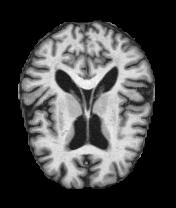

In [12]:
img = tf.keras.preprocessing.image.load_img(VeryMildDemented_train_path[66])
img

**Very Mild Demented MRI Image (Test)**

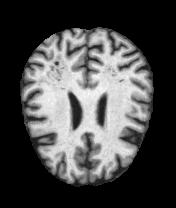

In [13]:
img = tf.keras.preprocessing.image.load_img(VeryMildDemented_test_path[43])
img

**Conversion if images into GRAYSCALE format**


In [14]:
#GET IMAGES IN GRASCALE

MildDemented_train_GS = get_np_images_grayscale(MildDemented_train_path)#717
ModerateDemented_train_GS = get_np_images_grayscale(ModerateDemented_train_path)#52
NonDemented_train_GS = get_np_images_grayscale(NonDemented_train_path)#2560
VeryMildDemented_train_GS = get_np_images_grayscale(VeryMildDemented_train_path)#1792

VeryMildDemented_test_GS = get_np_images_grayscale(VeryMildDemented_test_path)#448
MildDemented_test_GS = get_np_images_grayscale(MildDemented_test_path)#179
ModerateDemented_test_GS = get_np_images_grayscale(ModerateDemented_test_path)#12
NonDemented_test_GS = get_np_images_grayscale(NonDemented_test_path)#640

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


**Assigning integers to each class:**

1.   MildDemented 0
2.   ModerateDemented 1
3.   NonDemented 2
4.   VeryMildDemented 3



**Creating labels for each class**

In [15]:
#GET LABELS FOR EACH IMAGE
MildDemented_train_label = get_labels(MildDemented_train_path,0)
ModerateDemented_train_label = get_labels(ModerateDemented_train_path,1)
NonDemented_train_label = get_labels(NonDemented_train_path,2)
VeryMildDemented_train_label = get_labels(VeryMildDemented_train_path,3)

VeryMildDemented_test_label = get_labels(VeryMildDemented_test_path,3)
MildDemented_test_label = get_labels(MildDemented_test_path,0)
NonDemented_test_label = get_labels(NonDemented_test_path,2)
ModerateDemented_test_label = get_labels(ModerateDemented_test_path,1)

**Preprocessing the data in order to use via CLASS WEIGHTING**


1.   Normalization of images
2.   Shuffling data
3.   Conversion of labels into one-hot encoded version



In [16]:
#CLASS WEIGHTING - NO CHANGE IN DATA

#FLATTEN THE DATA TO CONCATENATE AND SHUFFLE
MildDemented_train_GS_cw = MildDemented_train_GS.reshape((717,208*176))#717
ModerateDemented_train_GS_cw = ModerateDemented_train_GS.reshape((52,208*176))#52
NonDemented_train_GS_cw = NonDemented_train_GS.reshape((2560,208*176))#2560
VeryMildDemented_train_GS_cw = VeryMildDemented_train_GS.reshape((1792,208*176))#1792

#GET LABELS TO ANOTHER VARIABLE
MildDemented_train_label_cw = MildDemented_train_label
ModerateDemented_train_label_cw = ModerateDemented_train_label
NonDemented_train_label_cw = NonDemented_train_label
VeryMildDemented_train_label_cw = VeryMildDemented_train_label

#CONCATENATE LABELS AND DATA 
all_data_GS_cw = np.concatenate((MildDemented_train_GS_cw , ModerateDemented_train_GS_cw, NonDemented_train_GS_cw, VeryMildDemented_train_GS_cw), axis=0)
all_labels_cw = np.asarray(list(MildDemented_train_label_cw) + list(ModerateDemented_train_label_cw) + list(NonDemented_train_label_cw) + list(VeryMildDemented_train_label_cw))

#STANDARDIZE THE DATA
scaler_all_data_GS_cw = preprocessing.StandardScaler()
all_data_scaled = scaler_all_data_GS_cw.fit_transform(all_data_GS_cw)

#SHUFFLE DATA
all_data_scaled,all_labels_cw = shuffle(all_data_scaled,  all_labels_cw, random_state=0)

#RESHAPE DATA TO ORIGINAL FORM
all_data_scaled = all_data_scaled.reshape(((5121,208,176,1)))
num_classes = 4
#ONE HOT ENCODE LABELS
all_labels_cw = tf.keras.utils.to_categorical(list(all_labels_cw), num_classes)

**Preprocessing the test data**


1.   Normalization of images - using same values with trained data
2.   Conversion of labels into one-hot encoded version



In [17]:
#FLATTEN THE DATA TO CONCATENATE 
MildDemented_test_GS = MildDemented_test_GS.reshape((179,208*176))#179
ModerateDemented_test_GS = ModerateDemented_test_GS.reshape((12,208*176))#12
NonDemented_test_GS = NonDemented_test_GS.reshape((640,208*176))#640
VeryMildDemented_test_GS = VeryMildDemented_test_GS.reshape((448,208*176))#448

#CONCATENATE LABELS AND DATA 
test_data_GS = np.concatenate((MildDemented_test_GS , ModerateDemented_test_GS, NonDemented_test_GS, VeryMildDemented_test_GS), axis=0)
test_labels = np.asarray(list(MildDemented_test_label) + list(ModerateDemented_test_label) + list(NonDemented_test_label) + list(VeryMildDemented_test_label))

#STANDARDIZE THE DATA 
test_data_scaled = scaler_all_data_GS_cw.transform(test_data_GS)

#RESHAPE DATA TO ORIGINAL FORM
test_data_scaled = test_data_scaled.reshape((1279,208,176,1))
num_classes = 4
#ONE HOT ENCODE LABELS
test_labels = tf.keras.utils.to_categorical(list(test_labels), num_classes)

**5-Fold Cross Validation utilizing optimal hyperparameters that are obtained by tuning the following hyperparameters:**

1.   Learning rate : 1
2.   Epoch size : 50
3.   Batch size : 64
4.   Dropout rate : 0.50
5.   Type of optimizer : AdaDelta Optimizer
6.   Inclusion of Batch Normalization : With Batch Norm
7.   Use L1 norm 

**For each fold both ACCURACY and BALANCED ACCURACY is obtained and they are averaged individually for 5 folds in order to be used as a metric to investigate the performance of the model**

**Training Loss and Validation loss is averaged for the cross validation phase in order to display that overfitting not occurs**

**Class weights are inversly proportional with the number of samples for each class**


In [30]:
#PARAMETERS TO BE USED
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1
class_weight = {0: 7,#717 
                  1: 150,#52 
                  2: 2,#2560 
                  3: 3}#1792 
input_shape = (208,176,1)
num_classes = 4
epochs = 50
batch_size = 64
average_accuracy = 0
average_balanced_accuracy = 0
average_train_loss_per_epoch = epochs * [0]
average_valid_loss_per_epoch = epochs * [0]
for X_train, X_valid in kfold.split(all_data_scaled[0:3000,:,:,:], all_labels_cw[0:3000,:]):
  #MODEL
  model = Sequential()
  model.add(Conv2D(16, kernel_size=(5, 5),
                  activation='relu',
                  input_shape=input_shape, padding="same"))
  model.add(MaxPooling2D())
  model.add(BatchNormalization())
  model.add(Conv2D(16, kernel_size= (5,5), activation='relu', padding="same"))
  model.add(MaxPooling2D())
  model.add(BatchNormalization())
  model.add(Conv2D(16, kernel_size=(5,5),activation='relu', padding="same"))
  model.add(MaxPooling2D())
  model.add(BatchNormalization())
  model.add(Conv2D(32, kernel_size=(3,3),activation='relu', padding="same"))
  model.add(MaxPooling2D())
  model.add(BatchNormalization())
  model.add(Conv2D(32, kernel_size=(3,3),activation='relu', padding="same"))
  model.add(MaxPooling2D())
  model.add(BatchNormalization())
  model.add(Conv2D(32, kernel_size=(3,3),activation='relu', padding="same",kernel_regularizer=tf.keras.regularizers.l1(0.001)))
  model.add(MaxPooling2D())
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.50))
  model.add(Dense(16, activation = 'relu'))
  model.add(Dense(num_classes, activation='softmax'))

  #COMPILE MODEL

  model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(learning_rate = 1),
              metrics=['accuracy'])
  

  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  print("\n")
  #FIT MODEL
  history = model.fit(x=all_data_scaled[X_train], y=all_labels_cw[X_train],
                    batch_size=batch_size,
                    class_weight = class_weight,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(all_data_scaled[X_valid], all_labels_cw[X_valid]),
                    shuffle = True)
  print("\n")
  print(f'Validation for fold {fold_no} ...')
  #VALIDATE MODEL 
  y_pred = model.predict(all_data_scaled[X_valid])
  y_pred_labels = np.argmax(y_pred, axis=1)
  y_act_labels = np.argmax(all_labels_cw[X_valid], axis=1)
  cm = confusion_matrix(y_act_labels, y_pred_labels) 
  print(cm)
  print("\n")
  accuracy = accuracy_score(y_act_labels, y_pred_labels)
  balanced_accuracy = balanced_accuracy_score(y_act_labels, y_pred_labels)
  print("ACCURACY: ", accuracy)
  print("BALANCED ACCURACY: ", balanced_accuracy)
  #ACCUMULATE ACCURACY AND AVERAGE ACCURACY FOR FURTHER USE TO DISPLAY AVERAGE PERFORMANCE
  average_accuracy += accuracy
  average_balanced_accuracy += balanced_accuracy
  #ACCUMULATE LOSSES OF BOTH TRAIN AND VALIDATION FOR FURTHER USE TO DISPLAY THAT WE ARE NOT OVERFITTING
  average_train_loss_per_epoch = [sum(x) for x in zip(average_train_loss_per_epoch, history.history['loss'])]
  average_valid_loss_per_epoch = [sum(x) for x in zip(average_valid_loss_per_epoch, history.history['val_loss'])]
  fold_no = fold_no + 1
  del model
  gc.collect()

------------------------------------------------------------------------
Training for fold 1 ...


Epoch 1/50
38/38 [==============================] - 5s 72ms/step - loss: 14.2909 - accuracy: 0.3895 - val_loss: 5.9498 - val_accuracy: 0.5000
Epoch 2/50
38/38 [==============================] - 2s 46ms/step - loss: 10.8397 - accuracy: 0.3861 - val_loss: 5.8170 - val_accuracy: 0.5000
Epoch 3/50
38/38 [==============================] - 2s 46ms/step - loss: 10.7721 - accuracy: 0.3955 - val_loss: 5.6892 - val_accuracy: 0.5000
Epoch 4/50
38/38 [==============================] - 2s 46ms/step - loss: 9.2837 - accuracy: 0.4522 - val_loss: 5.5886 - val_accuracy: 0.5000
Epoch 5/50
38/38 [==============================] - 2s 46ms/step - loss: 9.2103 - accuracy: 0.4600 - val_loss: 5.4651 - val_accuracy: 0.5033
Epoch 6/50
38/38 [==============================] - 2s 46ms/step - loss: 8.2134 - accuracy: 0.4962 - val_loss: 5.3230 - val_accuracy: 0.5267
Epoch 7/50
38/38 [==============================] - 

**Average validation scores pointed out via accuracy and balanced accuracy**

In [32]:
average_accuracy = average_accuracy / num_folds
average_balanced_accuracy = average_balanced_accuracy / num_folds
print("AVERAGE VALIDATION SCORES\n")
print("ACCURACY: ", average_accuracy)
print("BALANCED ACCURACY: ", balanced_accuracy)

AVERAGE VALIDATION SCORES

ACCURACY:  0.8059999999999998
BALANCED ACCURACY:  0.7365511476191049


**Plotting epoch vs training and validation losses**

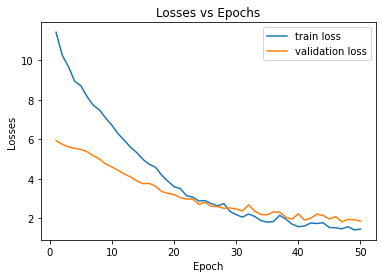

In [33]:
avg_train_losses= [x / num_folds for x in average_train_loss_per_epoch]
avg_valid_losses= [x / num_folds for x in average_valid_loss_per_epoch]
epoch_list = list(range(1, epochs+1))
plt.title("Losses vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.plot(epoch_list, avg_train_losses)
plt.plot(epoch_list, avg_valid_losses)
plt.legend(['train loss', 'validation loss'], loc='upper right')

**Re-declaring the model to summarize its properties and to be used for testing purpose**

In [18]:
# #MODEL
class_weight = {0: 8,#717 -- 7
                1: 150,#52 -- 98
                2: 2,#2560 -- 2
                3: 3}#1792 -- 3
input_shape = (208,176,1)
num_classes = 4
epochs = 50
batch_size = 32
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape, padding="same"))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size= (5,5), activation='relu', padding="same"))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size=(5,5),activation='relu', padding="same"))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3),activation='relu', padding="same"))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3),activation='relu', padding="same"))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3),activation='relu', padding="same",))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(16, activation = 'relu',activity_regularizer=tf.keras.regularizers.l1(0.001)))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(learning_rate = 1),
              metrics=['accuracy'])

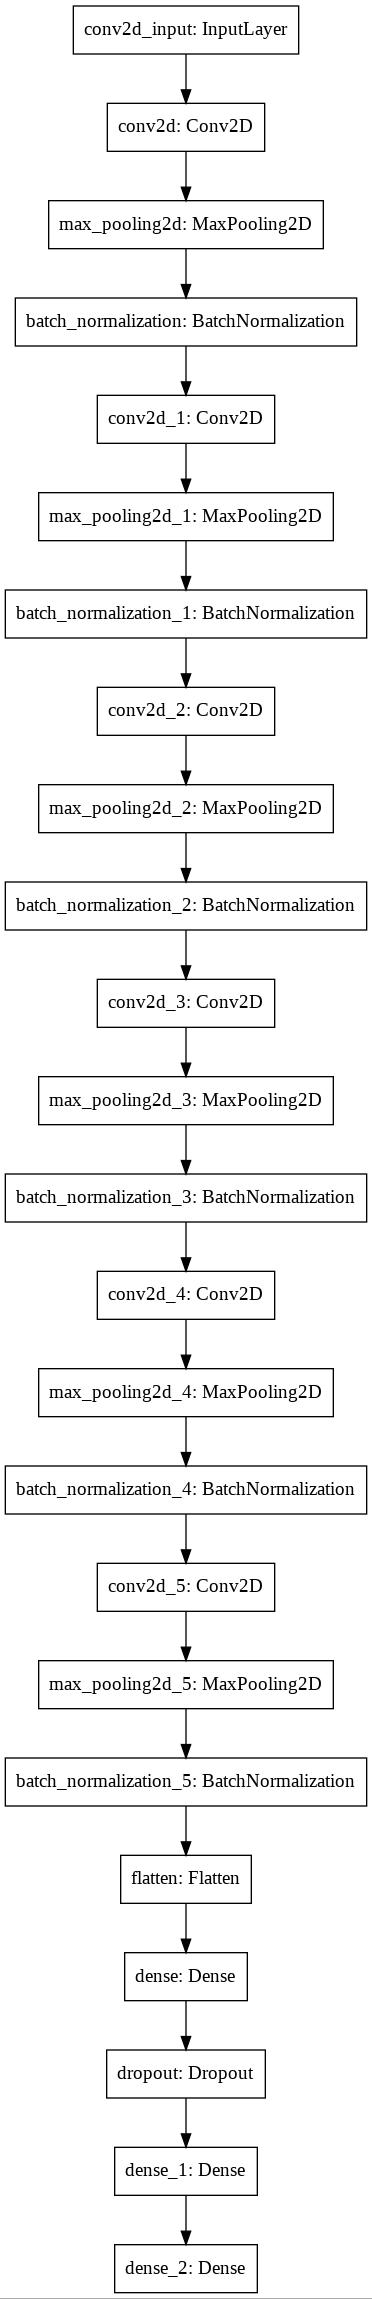

In [29]:
plot_model(model, to_file='model_plot.jpg')

**Model Summary**

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 208, 176, 16)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 104, 88, 16)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 104, 88, 16)       64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 104, 88, 16)       6416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 52, 44, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 52, 44, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 44, 16)        6

**Fitting the data into model**

*   Use all of the training data (train + validation) to train the optimal model

In [20]:
 history = model.fit(x=all_data_scaled, y=all_labels_cw, 
                     batch_size=batch_size,
                     class_weight = class_weight,
                     epochs=epochs,
                     verbose=1,
                     shuffle = True)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/50
161/161 [==============================] - 44s 23ms/step - loss: 8.7091 - accuracy: 0.3223
Epoch 2/50
161/161 [==============================] - 3s 22ms/step - loss: 5.9464 - accuracy: 0.3988
Epoch 3/50
161/161 [==============================] - 3s 21ms/step - loss: 4.8027 - accuracy: 0.4575
Epoch 4/50
161/161 [==============================] - 3s 21ms/step - loss: 3.5606 - accuracy: 0.4973
Epoch 5/50
161/161 [==============================] - 3s 21ms/step - loss: 3.1110 - accuracy: 0.5259
Epoch 6/50
161/161 [==============================] - 3s 21ms/step - loss: 2.8821 - accuracy: 0.5721
Epoch 7/50
161/161 [==============================] - 3s 21ms/step - loss: 2.4800 - accuracy: 0.6197
Epoch 8/50
161/161 [==============================] - 3s 22ms/step - loss: 2.1587 - accuracy: 0.6484
Epoch 9/50
161/161 [==============================] -

**Test result of the model**

*   Accuracy
*   Balanced Accuracy
*   Weighted Precision
*   Weighted Recall



In [25]:
y_pred = model.predict(test_data_scaled)
y_pred_labels = np.argmax(y_pred, axis=1)
y_act_labels = np.argmax(test_labels, axis=1)
cm = confusion_matrix(y_act_labels, y_pred_labels)
print(cm)
print("\n")
print("ACCURACY: ", accuracy_score(y_act_labels, y_pred_labels))
print("\n")
print("BALANCED ACCURACY: ", balanced_accuracy_score(y_act_labels, y_pred_labels))
print("\n")
print("PRECISION: ",precision_score(y_act_labels, y_pred_labels, average='weighted'))
print("\n")
print("RECALL: ",recall_score(y_act_labels, y_pred_labels, average='weighted'))

[[ 80   0  30  69]
 [  0   5   1   6]
 [ 17   0 486 137]
 [ 17   3 126 302]]


ACCURACY:  0.6825645035183737


BALANCED ACCURACY:  0.5742690459563714


PRECISION:  0.6880909529781177


RECALL:  0.6825645035183737


**Confusion Matrix of the Test Result**

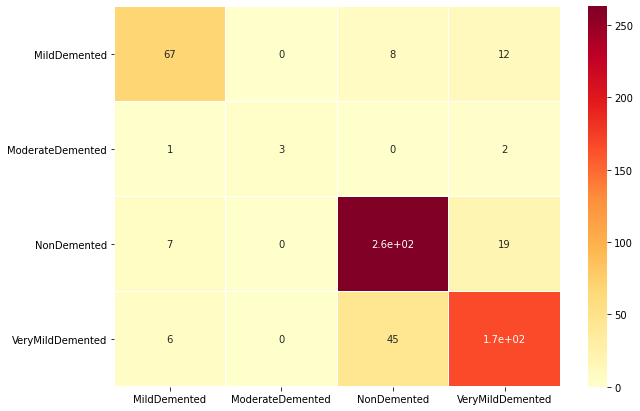

In [31]:
df = pd.DataFrame(cm, index = ["MildDemented","ModerateDemented","NonDemented","VeryMildDemented"],
                  columns = ["MildDemented","ModerateDemented","NonDemented","VeryMildDemented"])
plt.figure(figsize = (10,7))
sn.heatmap(df, annot=True, linewidths=.25, cmap='YlOrRd')
plt.show()
